In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken

import fasttext
from huggingface_hub import hf_hub_download

In [2]:
data = pd.read_csv("../data/educhat-translation/all_translations.csv")
data.isna().sum()

English       0
Arabic        0
Bengali       0
Burmese       0
Cantonese     0
Hindi         0
Indonesian    0
Japanese      0
Khmer         0
Korean        0
Mandarin      0
Mongolian     0
Nepali        0
Persian       0
Portuguese    0
Punjabi       0
Spanish       0
Swahili       1
Tagalog       0
Thai          0
Turkish       0
Urdu          0
Vietnamese    0
dtype: int64

In [3]:
encoding = tiktoken.encoding_for_model("gpt-4o")

In [4]:
def num_tokens_from_string(string: str, model_name: str) -> int:
    
    encoding = tiktoken.encoding_for_model(model_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

def get_cost(string, input_price, output_price):
    num_tokens = num_tokens_from_string(string, "gpt-4o")
    return (187*input_price + num_tokens*output_price)

In [5]:
input_price = 2.5/10e6
output_price = 10/10e6
output_price

1e-06

In [6]:
num_tokens_from_string("Given an English text, translate it to the target language: Bengali", "gpt-4o")

13

In [7]:
tokens.sum()

NameError: name 'tokens' is not defined

In [ ]:
(13+tokens["English"])*input_price + tokens["English"]*output_price

0     0.000198
1     0.000311
2     0.000323
3     0.000376
4     0.000304
5     0.000221
6     0.000206
7     0.000155
8     0.000267
9     0.000381
10    0.000173
11    0.000133
12    0.000223
13    0.000189
14    0.000198
15    0.000130
16    0.000170
17    0.000203
18    0.000143
19    0.000164
20    0.000446
21    0.000558
22    0.000351
23    0.000378
24    0.000486
25    0.000356
26    0.000356
27    0.000242
28    0.000369
29    0.000425
30    0.000041
31    0.000047
32    0.000042
33    0.000038
34    0.000044
35    0.000036
36    0.000034
37    0.000042
38    0.000034
39    0.000034
40    0.000184
41    0.000122
42    0.000100
43    0.000128
44    0.000124
45    0.000088
46    0.000111
47    0.000117
48    0.000071
49    0.000106
50    0.000150
51    0.000263
52    0.000288
53    0.000317
54    0.000393
55    0.000413
56    0.000554
57    0.000377
58    0.000209
59    0.000286
Name: English, dtype: float64

In [11]:
tokens = pd.DataFrame()
cost = pd.DataFrame()
for lang in data.columns:
    tokens[lang] = data[lang].apply(lambda x : num_tokens_from_string(x, "gpt-4o") if type(x) == str else 0)
# (tokens["English"]*input_price +tokens*output_price).sum()

for lang in list(data.columns)[:]:
    cost[lang] = (13+tokens["English"])*input_price + tokens[lang]*output_price

cost.iloc[:, 1:].mean().sum()



np.float64(0.007350491666666665)

In [12]:
unigrams = pd.DataFrame()
for lang in data.columns:
    unigrams[lang] = data[lang].apply(lambda x : len(x.split()) if type(x) == str else 0)
unigrams.mean()

English       137.583333
Arabic        115.283333
Bengali       129.483333
Burmese        75.116667
Cantonese       7.983333
Hindi         162.033333
Indonesian    131.166667
Japanese        9.350000
Khmer          38.633333
Korean        102.050000
Mandarin        7.400000
Mongolian     120.516667
Nepali        130.083333
Persian       144.666667
Portuguese    143.433333
Punjabi       156.066667
Spanish       152.366667
Swahili       132.800000
Tagalog       163.933333
Thai           34.983333
Turkish       113.166667
Urdu          177.466667
Vietnamese    204.933333
dtype: float64

In [10]:
model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)

def get_lang_prob(text, language):
    languages = {
        "Arabic": "__label__arb_Arab",
        "Bengali": "__label__ben_Beng",
        "Burmese": "__label__mya_Mymr",
        "Cantonese": "__label__yue_Hant",
        "English": "__label__eng_Latn",
        "Hindi": "__label__hin_Deva",
        "Indonesian": "__label__ind_Latn",
        "Japanese": "__label__jpn_Jpan",
        "Khmer": "__label__khm_Khmr",
        "Korean": "__label__kor_Hang",
        "Mandarin": "__label__zho_Hans",
        "Mongolian": "__label__khk_Cyrl",
        "Nepali": "__label__npi_Deva",
        "Persian": "__label__pes_Arab",
        "Portuguese": "__label__por_Latn",
        "Punjabi": "__label__pan_Guru",
        "Spanish": "__label__spa_Latn",
        "Swahili": "__label__swh_Latn",
        "Tagalog": "__label__tgl_Latn",
        "Thai": "__label__tha_Thai",
        "Turkish": "__label__tur_Latn",
        "Urdu": "__label__urd_Arab",
        "Vietnamese": "__label__vie_Latn",
    }
    
    lines = text.split("\n")
    probability = 0.0
    for line in lines:    
        predictions = model.predict(line, k = 218)
        predictions = dict([(predictions[0][i], predictions[1][i]) for i in range(218)])
        probability += predictions[languages[language]]
    
    
    return probability/len(lines)

model.bin:   0%|          | 0.00/1.18G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
lang_prob = pd.DataFrame()
for lang in data.columns:
    lang_prob[lang] = data[lang].apply(lambda x : get_lang_prob(x, lang) if type(x) == str else 0)
lang_prob.mean()

English       0.868803
Arabic        0.994288
Bengali       0.940088
Burmese       0.982530
Cantonese     0.672244
Hindi         0.860985
Indonesian    0.894529
Japanese      0.788598
Khmer         0.973443
Korean        0.942017
Mandarin      0.461631
Mongolian     0.952197
Nepali        0.577414
Persian       0.513585
Portuguese    0.689992
Punjabi       0.958151
Spanish       0.931933
Swahili       0.935999
Tagalog       0.944907
Thai          0.682865
Turkish       0.988028
Urdu          0.504389
Vietnamese    0.992105
dtype: float64

,index,0
0,English,10429
1,Arabic,13530
2,Bengali,17244
3,Burmese,28047
4,Cantonese,14179
5,Hindi,15745
6,Indonesian,13397
7,Japanese,17283
8,Khmer,27899
9,Korean,14711


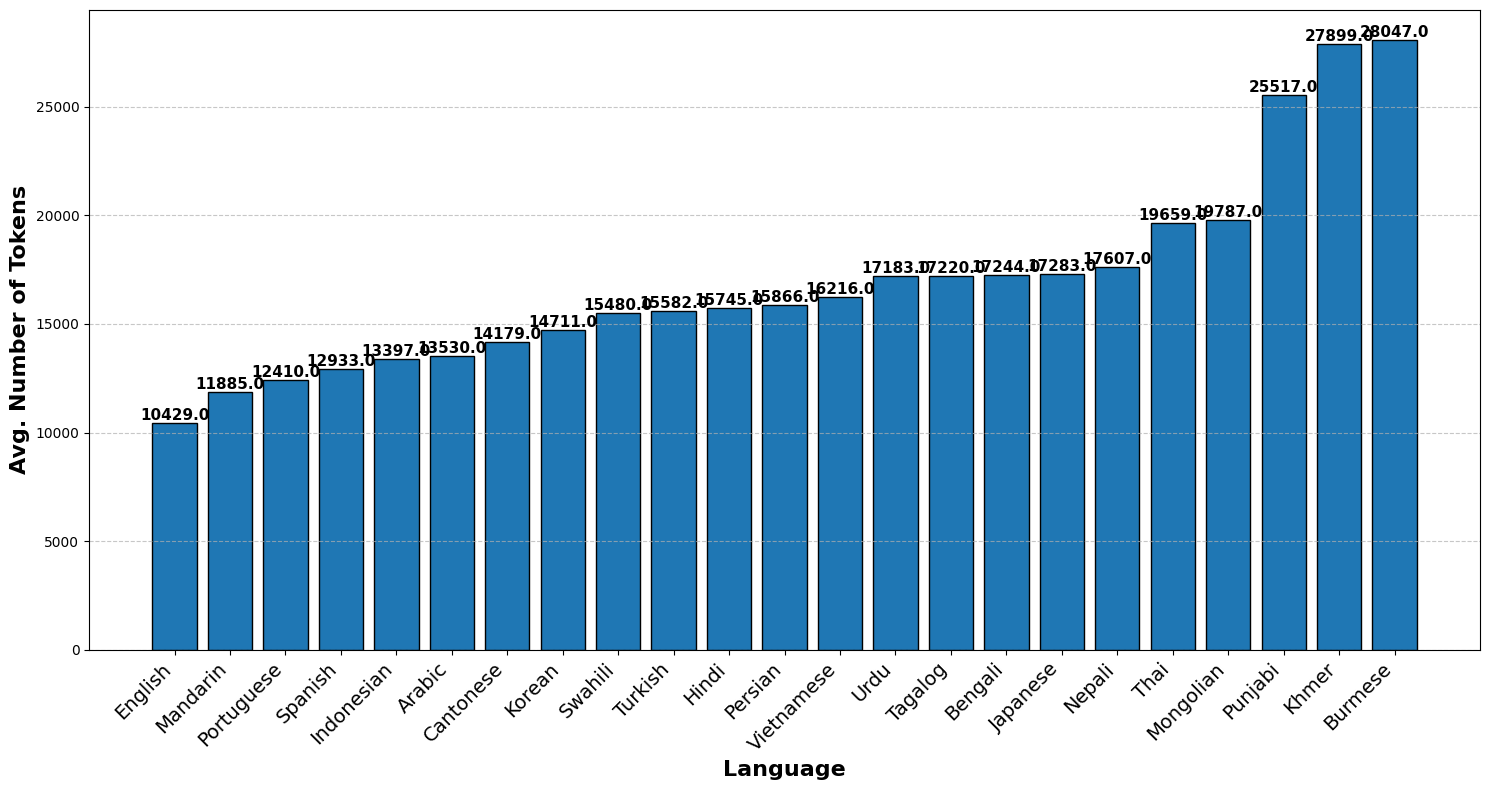

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe from the data
df = tokens.sum().reset_index()
df.columns = ["Language", "Tokens"]

# df = pd.DataFrame(data)

# Sort by number of tokens
df = df.sort_values('Tokens')

# Create the plot
plt.figure(figsize=(15, 8))

# Create bars
bars = plt.bar(range(len(df)), df['Tokens'], edgecolor='black')

# Customize the plot
plt.xticks(range(len(df)), df['Language'], rotation=45, ha='right', fontsize=14)
plt.ylabel('Avg. Number of Tokens', fontsize=16, fontweight='bold')
plt.xlabel('Language', fontsize=16, fontweight='bold')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=11, fontweight = 'bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('../figs/language_tokens.png', dpi=300, bbox_inches='tight')
plt.show()

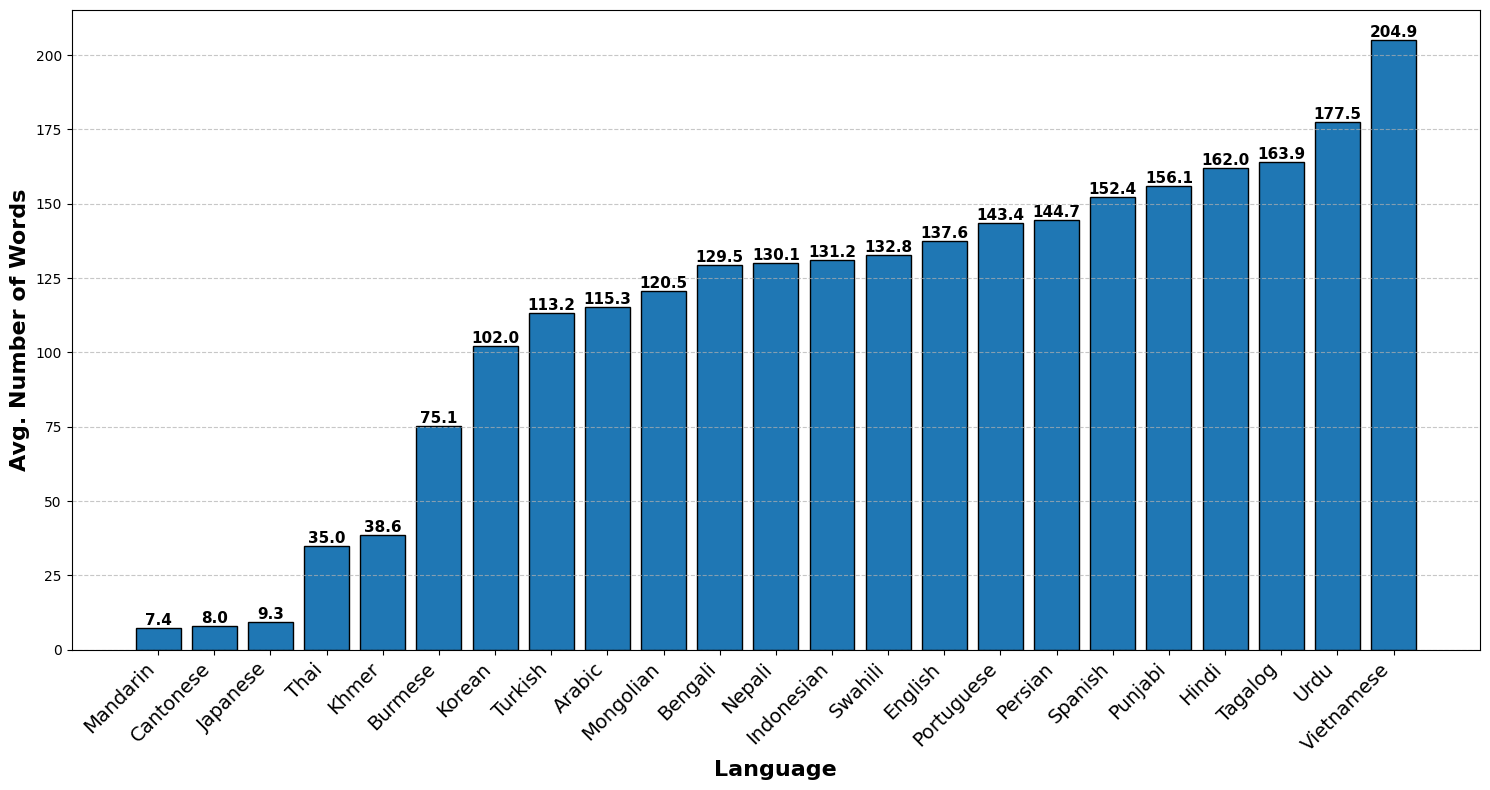

In [16]:
data = {
    'Language': ['English', 'Arabic', 'Bengali', 'Burmese', 'Cantonese', 'Hindi', 
                'Indonesian', 'Japanese', 'Khmer', 'Korean', 'Mandarin', 'Mongolian',
                'Nepali', 'Persian', 'Portuguese', 'Punjabi', 'Spanish', 'Swahili',
                'Tagalog', 'Thai', 'Turkish', 'Urdu', 'Vietnamese'],
    'Tokens': [137.58, 115.28, 129.48, 75.12, 7.98, 162.03, 
               131.17, 9.35, 38.63, 102.05, 7.40, 120.52,
               130.08, 144.67, 143.43, 156.07, 152.37, 132.80,
               163.93, 34.98, 113.17, 177.47, 204.93]
}

df = pd.DataFrame(data)

# Sort by number of tokens
df = df.sort_values('Tokens', ascending=True)

# Create the plot
plt.figure(figsize=(15, 8))

# Create bars
bars = plt.bar(range(len(df)), df['Tokens'], edgecolor='black')

# Customize the plot
plt.xticks(range(len(df)), df['Language'], rotation=45, ha='right', fontsize=14)
plt.ylabel('Avg. Number of Words', fontsize=16, fontweight='bold')
plt.xlabel('Language', fontsize=16, fontweight='bold')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=11, fontweight = 'bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('../figs/language_words.png', dpi=300, bbox_inches='tight')
plt.show()